Column Count Statistics:
25th Percentile: 17155.25
Median (50th Percentile): 20844.5
75th Percentile: 27268.5
90th Percentile: 31972.0
Interquartile Range (IQR): 10113.25


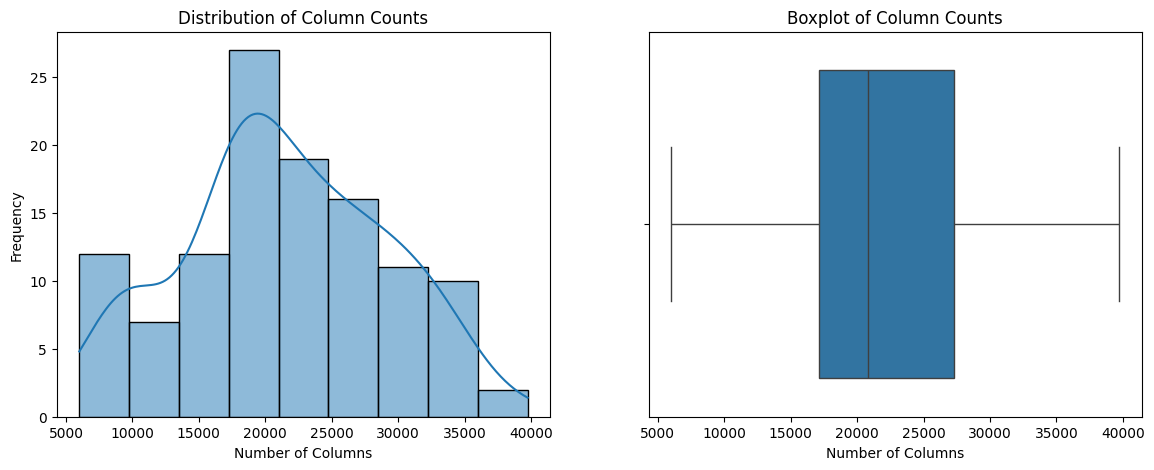

In [4]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Gather column counts from all files
def gather_column_counts(file_paths):
    column_counts = []
    for file in file_paths:
        data = pd.read_csv(file)
        column_counts.append(data.shape[1])
    return column_counts

# Step 2: Perform EDA to decide on target column count
def analyze_column_counts(column_counts):
    # Display statistical measures
    percentiles = np.percentile(column_counts, [25, 50, 75, 90])
    iqr = percentiles[2] - percentiles[0]
    print("Column Count Statistics:")
    print(f"25th Percentile: {percentiles[0]}")
    print(f"Median (50th Percentile): {percentiles[1]}")
    print(f"75th Percentile: {percentiles[2]}")
    print(f"90th Percentile: {percentiles[3]}")
    print(f"Interquartile Range (IQR): {iqr}")
    
    # Plot histogram and boxplot
    plt.figure(figsize=(14, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(column_counts, kde=True)
    plt.title("Distribution of Column Counts")
    plt.xlabel("Number of Columns")
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=column_counts)
    plt.title("Boxplot of Column Counts")
    plt.xlabel("Number of Columns")
    plt.show()

# File paths for MFCC CSV files
file_paths = glob.glob('C:/Users/mahim/Desktop/DS203 FILES/MFCCCC/*.csv')

# Step 3: Gather and analyze column counts
column_counts = gather_column_counts(file_paths)
analyze_column_counts(column_counts)


FIXED SIZE CHOSEN = 25000 COLOUMNS

In [5]:
import pandas as pd
import numpy as np
import glob
import os

def mean_max_pooling(data, target_size):
    current_size = data.shape[1]
    
    if current_size > target_size:
        # Downsampling by mean-max pooling
        factor = current_size / target_size
        pooled_data = []
        
        for i in range(target_size):
            start_idx = int(i * factor)
            end_idx = int((i + 1) * factor)
            segment = data.iloc[:, start_idx:end_idx]
            
            # Calculate mean and max for the segment
            mean_values = segment.mean(axis=1)
            max_values = segment.max(axis=1)
            # Combine mean and max to form the pooled result
            combined_values = (mean_values + max_values) / 2
            pooled_data.append(combined_values)
        
        data_resized = pd.DataFrame(pooled_data).T
    
    elif current_size < target_size:
        # Upsampling by padding
        padding = pd.DataFrame(0, index=data.index, columns=range(target_size - current_size))
        data_resized = pd.concat([data, padding], axis=1)
    else:
        # No resizing needed
        data_resized = data
    
    return data_resized

def resize_mfcc_files(input_dir, output_dir, target_size):
    # Get all CSV files in the input directory
    file_paths = glob.glob(os.path.join(input_dir, "*.csv"))
    if not file_paths:
        print("No CSV files found in the specified directory.")
        return
    
    # Process each file
    for file_path in file_paths:
        # Read the CSV file
        data = pd.read_csv(file_path, header=None)
        
        # Apply mean-max pooling to reach the target size
        data_resized = mean_max_pooling(data, target_size)
        
        # Save the resized data to the output directory
        file_name = os.path.basename(file_path)
        output_path = os.path.join(output_dir, file_name)
        data_resized.to_csv(output_path, index=False, header=False)
        print(f"Resized and saved: {output_path}")

# Parameters
input_dir = "C:/Users/mahim/Desktop/DS203 FILES/MFCCCC"   # Directory containing the original MFCC CSV files
output_dir = "C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize" # Directory to save the resized CSV files
target_size = 25000  # Set your chosen target column size here

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Resize all files to the target size
resize_mfcc_files(input_dir, output_dir, target_size)


Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\01-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\02-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\03-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\04-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\05-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\06-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\07-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\08-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\09-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\10-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\100-MFCC.csv
Resized and saved: C:/Users/mahim/Desktop/DS203 FILES/csv_new_resize\101-MFCC.csv
Resized and saved: C:/User